**My task - You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.
**

## We will be answering these 3 main questions through our analysis. 


**1. What are some trends in smart device usage?**

**2. How could these trends apply to Bellabeat customers?**

**3. How could these trends help influence Bellabeat marketing strategy?****



# Statement of Business Task 

The objective of this analysis is to Improve Bellabeat’s current marketing strategy by analyzing trends in available consumer data for smart devices. By getting the insights as to how consumers are using non-Bellabeat smart products, we can then use these insights to apply them to the marketing of Bellabeat’s own products. 

Find the trends in how people are using their smart devices using the data available. 
Identify how these trends can be applied to Bellabeat’s own customer base. 
And then identify and make recommendations on how these trends can influence Bellabeat’s marketing strategy. 

The results will be presented to the Bellabeat executive team along with my own high level recommendations.


# Prepare Phase

**Description of All Data sources used**

The data is taken from the FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius) in Kaggle. The data is open-source, licensed under public domain, accessible to all for whatever purposes necessary.

Most of the data is long format, however we have wide format data as well. 

Limitations of the data - When it comes to credibility and bias of the data source, we have to remember, this data is from 30 fitbit users who consented to the submission of their personal tracker data. Ideally, we would have liked a bigger sample size to reduce bias and also since we are focused on improving women’s health products, we are not certain of the gender of the participants who we have the data from. 

The data contains minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. We can then analyze this data to help us uncover trends in the users habits and answer the questions/objectives we have mentioned in our statement of business task. 

We will be using the R programming language to clean, analayze and visualize the data.**


# **Process Data** (Data Cleaning/Transformation)

* We will be using R programming language for the data cleaning, transformation, analysis and visualization process.
* Data integrity is maintained by keeping a clear record of the data cleaning and transformation processes (the steps detailed below explain the cleaning and transformation processes used and will also serve as a document to go back to if necessary, or to be shared with a colleague)
* Steps to be taken in the data cleaning process will be to clean column names if necessary, remove duplicates, check if data types are correct and appropriate for the data we have and that it is right for the upcoming analysis. 


## Let's first load the basic packages we will need for our data cleaning, transformation, analysis and visualization.

In [1]:
library(tidyverse) #process data
library(lubridate) #clean/transform data
library(dplyr) #process data
library(janitor) #clean data
library(skimr) #process data
library(here) #process data
library(readr) #read CSV files
library (ggplot2) #visualize data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working



Let's create data frames for the CSV files we will be using. We will start with the sleep minute dataset to gain insights into the participants sleep trends

In [2]:
sleep_minutes <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
#loads the minute sleep data set

Let's get a quick overview of our data by using the View() and head() functions, and by creating a tibble using the tibble() function from the tibble package."

In [3]:
View(sleep_minutes)
head(sleep_minutes)
tibble(sleep_minutes)

Id,date,value,logId
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589
1503960366,4/12/2016 2:53:30 AM,1,11380564589
1503960366,4/12/2016 2:54:30 AM,2,11380564589
1503960366,4/12/2016 2:55:30 AM,2,11380564589


,Id,date,value,logId
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 2:47:30 AM,3,11380564589
2,1503960366,4/12/2016 2:48:30 AM,2,11380564589
3,1503960366,4/12/2016 2:49:30 AM,1,11380564589
4,1503960366,4/12/2016 2:50:30 AM,1,11380564589
5,1503960366,4/12/2016 2:51:30 AM,1,11380564589
6,1503960366,4/12/2016 2:52:30 AM,1,11380564589


Id,date,value,logId
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589
1503960366,4/12/2016 2:53:30 AM,1,11380564589
1503960366,4/12/2016 2:54:30 AM,2,11380564589
1503960366,4/12/2016 2:55:30 AM,2,11380564589


In [4]:
#Let's check the number of distinct user IDs in this data set
n_distinct(sleep_minutes$Id)

[1] 24

We can see the date column shows datatype as 'character' when it should be in 'datetime' format. we will change this using the lubridate function. 
We will need to create a new column where our date format will be in 'datetime'

In [5]:
sleep_minutes$new_date <- mdy_hms(sleep_minutes$date)

In [6]:
#let's remove duplicates in this dataset.
sleep_minutes <- sleep_minutes %>% 
distinct()

Let's View the dataset again to make sure duplicates have been removed and our new date column has been added too. 

In [7]:
View(sleep_minutes)

Id,date,value,logId,new_date
<dbl>,<chr>,<int>,<dbl>,<dttm>
1503960366,4/12/2016 2:47:30 AM,3,11380564589,2016-04-12 02:47:30
1503960366,4/12/2016 2:48:30 AM,2,11380564589,2016-04-12 02:48:30
1503960366,4/12/2016 2:49:30 AM,1,11380564589,2016-04-12 02:49:30
1503960366,4/12/2016 2:50:30 AM,1,11380564589,2016-04-12 02:50:30
1503960366,4/12/2016 2:51:30 AM,1,11380564589,2016-04-12 02:51:30
1503960366,4/12/2016 2:52:30 AM,1,11380564589,2016-04-12 02:52:30
1503960366,4/12/2016 2:53:30 AM,1,11380564589,2016-04-12 02:53:30
1503960366,4/12/2016 2:54:30 AM,2,11380564589,2016-04-12 02:54:30
1503960366,4/12/2016 2:55:30 AM,2,11380564589,2016-04-12 02:55:30


Let's change the column titled 'value' to 'sleep_stage' and then change the values from 1 to 3, to "Asleep", "Restless" and "Awake"

In [8]:
# Rename the column "value" to "sleep_stage"
sleep_minutes<- rename(sleep_minutes, sleep_stage = value)

In [9]:
# Recode the sleep stage values
sleep_minutes$sleep_stage <- recode(sleep_minutes$sleep_stage,
                                 "1" = "Asleep",
                                 "2" = "Restless",
                                 "3" = "Awake")

In [10]:
# check if column name and sleep stage values have been recoded. 
# Check the column names and first few rows of the data frame
colnames(sleep_minutes)
head(sleep_minutes)

[1] "Id"          "date"        "sleep_stage" "logId"       "new_date"

,Id,date,sleep_stage,logId,new_date
,<dbl>,<chr>,<chr>,<dbl>,<dttm>
1,1503960366,4/12/2016 2:47:30 AM,Awake,11380564589,2016-04-12 02:47:30
2,1503960366,4/12/2016 2:48:30 AM,Restless,11380564589,2016-04-12 02:48:30
3,1503960366,4/12/2016 2:49:30 AM,Asleep,11380564589,2016-04-12 02:49:30
4,1503960366,4/12/2016 2:50:30 AM,Asleep,11380564589,2016-04-12 02:50:30
5,1503960366,4/12/2016 2:51:30 AM,Asleep,11380564589,2016-04-12 02:51:30
6,1503960366,4/12/2016 2:52:30 AM,Asleep,11380564589,2016-04-12 02:52:30


Let's add a new column title 'day_of_week' to our data so that we can dive deeper into the sleep trends to help get us insights on weekend/weekday sleep patterns. 

In [11]:
# Create a new column called "day_of_week"
sleep_minutes$day_of_week <- weekdays(sleep_minutes$new_date)

In [12]:
# Let's check our data to make sure our new column has been updated to our data frame
head(sleep_minutes)

,Id,date,sleep_stage,logId,new_date,day_of_week
,<dbl>,<chr>,<chr>,<dbl>,<dttm>,<chr>
1,1503960366,4/12/2016 2:47:30 AM,Awake,11380564589,2016-04-12 02:47:30,Tuesday
2,1503960366,4/12/2016 2:48:30 AM,Restless,11380564589,2016-04-12 02:48:30,Tuesday
3,1503960366,4/12/2016 2:49:30 AM,Asleep,11380564589,2016-04-12 02:49:30,Tuesday
4,1503960366,4/12/2016 2:50:30 AM,Asleep,11380564589,2016-04-12 02:50:30,Tuesday
5,1503960366,4/12/2016 2:51:30 AM,Asleep,11380564589,2016-04-12 02:51:30,Tuesday
6,1503960366,4/12/2016 2:52:30 AM,Asleep,11380564589,2016-04-12 02:52:30,Tuesday


Now, let's load the sleep day dataset

In [13]:
sleep_day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
#loads the sleep data by day.

head(sleep_day)
#preview of the dataframe

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [14]:
sleep_day$SleepDay <- mdy_hms(sleep_day$SleepDay)

In [15]:
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


In [16]:
#Let's check the number of distinct user IDs in this data set
n_distinct(sleep_day$Id)

[1] 24

In [17]:
# Let's merge the sleep_minutes data with sleep_day data but exclude the 'SleepDay' column in the sleep_day data frame from the results
sleep_day_selected <- select(sleep_day, -SleepDay)



In [18]:
sleep_data <- merge(sleep_day_selected, sleep_minutes, by = "Id")

In [19]:
head(sleep_data)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,sleep_stage,logId,new_date,day_of_week
,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dttm>,<chr>
1,1503960366,1,327,346,4/12/2016 2:47:30 AM,Awake,11380564589,2016-04-12 02:47:30,Tuesday
2,1503960366,1,327,346,4/12/2016 2:48:30 AM,Restless,11380564589,2016-04-12 02:48:30,Tuesday
3,1503960366,1,327,346,4/12/2016 2:49:30 AM,Asleep,11380564589,2016-04-12 02:49:30,Tuesday
4,1503960366,1,327,346,4/12/2016 2:50:30 AM,Asleep,11380564589,2016-04-12 02:50:30,Tuesday
5,1503960366,1,327,346,4/12/2016 2:51:30 AM,Asleep,11380564589,2016-04-12 02:51:30,Tuesday
6,1503960366,1,327,346,4/12/2016 2:52:30 AM,Asleep,11380564589,2016-04-12 02:52:30,Tuesday


In [20]:
# Let's check the number of distinct user IDs in our merged data frame
n_distinct(sleep_data$Id)

[1] 24

## Now we are ready to proceed to the analysis stage for our sleep datasets

# Analysis and Share Phase

We want to calculate the percentage of sleep quality by participant and total average sleep quality of all participants.

In [21]:
# since our sleep_stage data is in character format, and we cant use that directly to calculate percentage, we will convert the stages to factor levels so we can do our calculations. 
sleep_data$sleep_stage <- factor(sleep_data$sleep_stage, levels = c("Asleep", "Restless", "Awake"))

In [22]:
# group the data by participant ID and calculate the percentage for each stage
sleep_summary <- sleep_data %>%
  group_by(Id) %>%
  summarize(
    asleep_pct = mean(sleep_stage == "Asleep") * 100,
    restless_pct = mean(sleep_stage == "Restless") * 100,
    awake_pct = mean(sleep_stage == "Awake") * 100
  )


In [23]:
print(sleep_summary)

# A tibble: 24 × 4
           Id asleep_pct restless_pct awake_pct
        <dbl>      <dbl>        <dbl>     <dbl>
 1 1503960366       94.0         5.22     0.762
 2 1644430081       85.0         5.27     9.75 
 3 1844505072       67.8        21.6     10.5  
 4 1927972279       95.2         4.39     0.365
 5 2026352035       94.1         5.25     0.598
 6 2320127002       88.4         5.80     5.80 
 7 2347167796       90.9         8.44     0.624
 8 3977333714       63.7        35.4      0.875
 9 4020332650       92.0         5.07     2.93 
10 4319703577       95.0         4.39     0.651
# … with 14 more rows


In [24]:
# calculate the overall average percentage for each stage
overall_summary <- sleep_summary %>%
  summarize(
    avg_asleep_pct = mean(asleep_pct),
    avg_restless_pct = mean(restless_pct),
    avg_awake_pct = mean(awake_pct)
  )

print(overall_summary)

# A tibble: 1 × 3
  avg_asleep_pct avg_restless_pct avg_awake_pct
           <dbl>            <dbl>         <dbl>
1           91.2             6.86          1.91


Let's visualize the quality of sleep per participant in a stacked bar chart. So that its easy for us to understand the differences in the quality of sleep of the different participants.

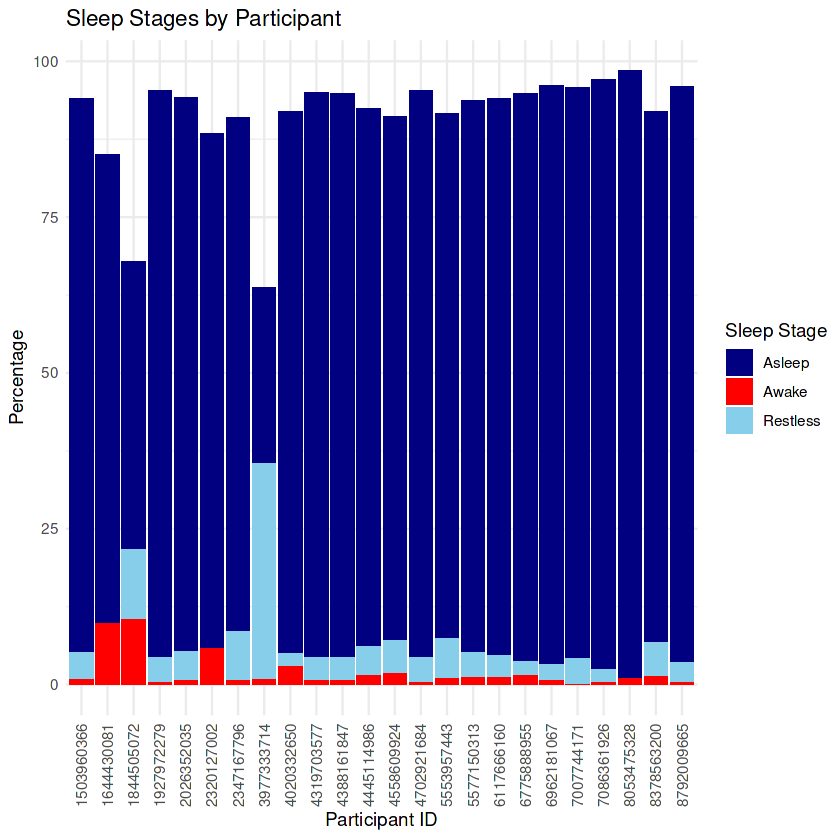

In [25]:
# convert ID to character data type (so that the ID numbers dont appear as scientific numbers in our viz)
sleep_summary$Id <- as.character(sleep_summary$Id)

# create bar plot
ggplot(sleep_summary, aes(x=Id, y=asleep_pct, fill="Asleep")) +
  geom_col(position="stack") +
  geom_col(aes(y=restless_pct, fill="Restless"), position="stack") +
  geom_col(aes(y=awake_pct, fill="Awake"), position="stack") +
  scale_fill_manual(values=c("navy blue", "red", "sky blue")) +
  labs(title="Sleep Stages by Participant",
       x="Participant ID",
       y="Percentage",
       fill="Sleep Stage") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

Now, let's do a quick visual to show us the sleep quality of all the participants as a whole. I thought a pie chart would show this best.

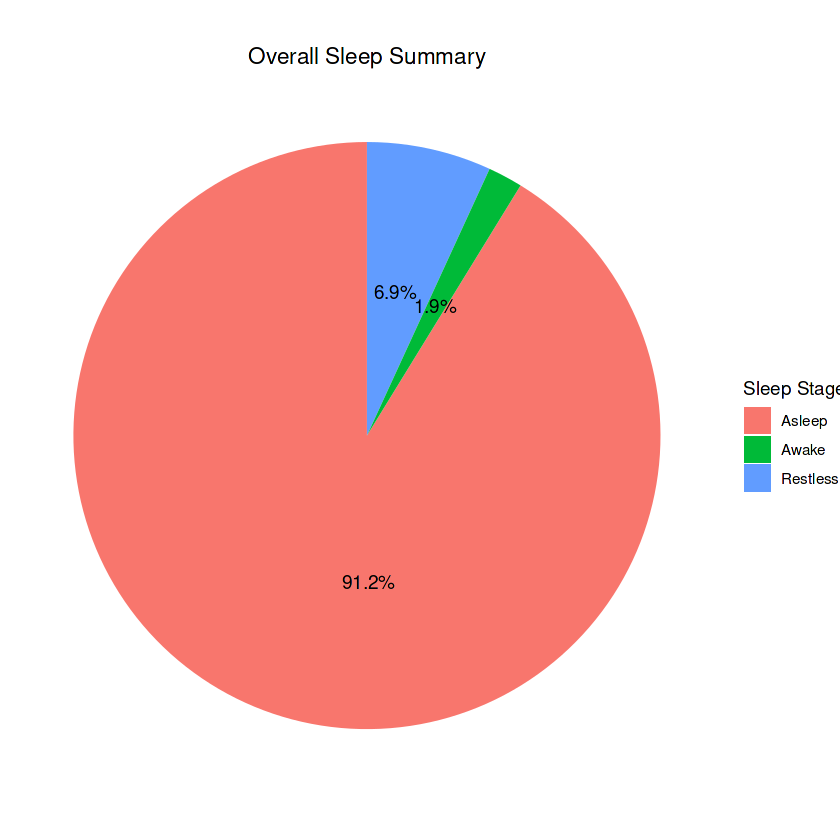

In [26]:
# create data frame
sleep_pie <- data.frame(
  category = c("Asleep", "Restless", "Awake"),
  value = c(overall_summary$avg_asleep_pct, overall_summary$avg_restless_pct, overall_summary$avg_awake_pct)
)

# create pie chart with labels
ggplot(sleep_pie, aes(x="", y=value, fill=category)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(round(value,1),"%")), position = position_stack(vjust = 0.45)) +
  labs(fill="Sleep Stage") +
  ggtitle("Overall Sleep Summary") +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5))

Now, let's check whether the weekend/weekdays have any impact on the level of sleep. 

In [27]:
sleep_data$weekend <- weekdays(sleep_data$new_date) %in% c("Saturday", "Sunday")

head(sleep_data)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,sleep_stage,logId,new_date,day_of_week,weekend
,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<dbl>,<dttm>,<chr>,<lgl>
1,1503960366,1,327,346,4/12/2016 2:47:30 AM,Awake,11380564589,2016-04-12 02:47:30,Tuesday,FALSE
2,1503960366,1,327,346,4/12/2016 2:48:30 AM,Restless,11380564589,2016-04-12 02:48:30,Tuesday,FALSE
3,1503960366,1,327,346,4/12/2016 2:49:30 AM,Asleep,11380564589,2016-04-12 02:49:30,Tuesday,FALSE
4,1503960366,1,327,346,4/12/2016 2:50:30 AM,Asleep,11380564589,2016-04-12 02:50:30,Tuesday,FALSE
5,1503960366,1,327,346,4/12/2016 2:51:30 AM,Asleep,11380564589,2016-04-12 02:51:30,Tuesday,FALSE
6,1503960366,1,327,346,4/12/2016 2:52:30 AM,Asleep,11380564589,2016-04-12 02:52:30,Tuesday,FALSE


In [28]:
weekend_sleep <- sleep_data %>%
filter(weekend == TRUE)

In [29]:
weekend_summary <- weekend_sleep %>% 
group_by(Id) %>%
  summarize(
    asleep_pct = mean(sleep_stage == "Asleep") * 100,
    restless_pct = mean(sleep_stage == "Restless") * 100,
    awake_pct = mean(sleep_stage == "Awake") * 100
  ) 

print(weekend_summary)

# A tibble: 22 × 4
           Id asleep_pct restless_pct awake_pct
        <dbl>      <dbl>        <dbl>     <dbl>
 1 1503960366       95.6         3.95     0.487
 2 1644430081       69.5         9.92    20.6  
 3 1844505072       72.4        17.2     10.3  
 4 2026352035       94.4         5.01     0.632
 5 2320127002       88.4         5.80     5.80 
 6 2347167796       95.1         4.58     0.301
 7 3977333714       59.9        39.6      0.464
 8 4020332650       92.1         4.18     3.76 
 9 4319703577       95.3         4.05     0.613
10 4388161847       95.0         4.39     0.633
# … with 12 more rows


In [30]:
weekend_overall_summary <- weekend_sleep %>% 
  summarize(
    asleep_pct = mean(sleep_stage == "Asleep") * 100,
    restless_pct = mean(sleep_stage == "Restless") * 100,
    awake_pct = mean(sleep_stage == "Awake") * 100
  ) 

print(weekend_overall_summary)

  asleep_pct restless_pct awake_pct
1   90.83873     8.139753  1.021514


From the above results, we can see that weekends, the sleep quality is reduced slightly but not in a significant way. 

# Load, Process (clean), Analyze and Visualize data related to physical activity.

**We will now load the daily activity, minute METs and hourly steps csv files. **

In [31]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
minute_METs <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


Let's take a quick overview of the 3 data frames. 

In [32]:
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [33]:
head(minute_METs)

,Id,ActivityMinute,METs
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,10
2,1503960366,4/12/2016 12:01:00 AM,10
3,1503960366,4/12/2016 12:02:00 AM,10
4,1503960366,4/12/2016 12:03:00 AM,10
5,1503960366,4/12/2016 12:04:00 AM,10
6,1503960366,4/12/2016 12:05:00 AM,12


In [34]:
head(hourly_steps)

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


In [35]:
#Let's get the number of User IDs we have for the 3 data frames to make sure our findings are consistent. 

n_distinct(daily_activity$Id)
n_distinct(hourly_steps$Id)
n_distinct(minute_METs$Id)

[1] 33

[1] 33

[1] 33

**all of the data frames above have 33 unique participants. **

In [36]:
#let's first work on the daily activity data. As the date appears in character format, we will change the data type of the existing column to date format. 
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)

In [37]:
#Let's take a quick look to see if our date column data type has changed. 
View(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


Now the 'ActivityDate' shows its been changed to 'date' format. 

In [38]:
# Check for duplicates. As from the below, we can see there were no duplicates. 
duplicated(daily_activity)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

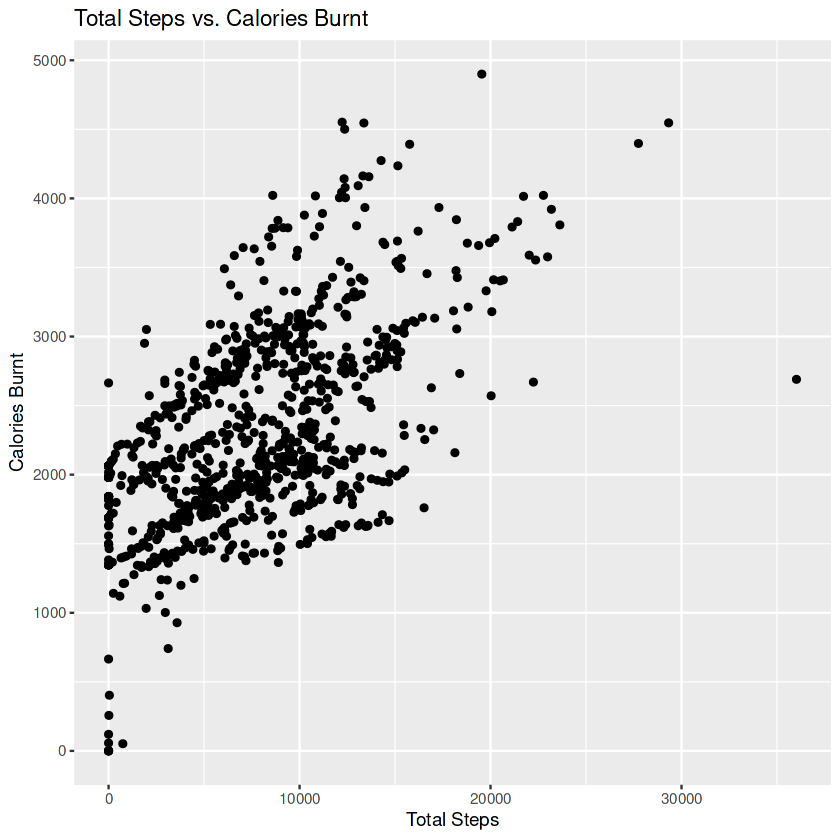

In [39]:
# What's the relationship between total steps taken to calories burnt. Lets do a quick visualization

#We can use these insights to get Bellabeat customers to walk more. 

ggplot(daily_activity, aes(x = TotalSteps, y = Calories)) +
  geom_point() +
  labs(title = "Total Steps vs. Calories Burnt",
       x = "Total Steps",
       y = "Calories Burnt")

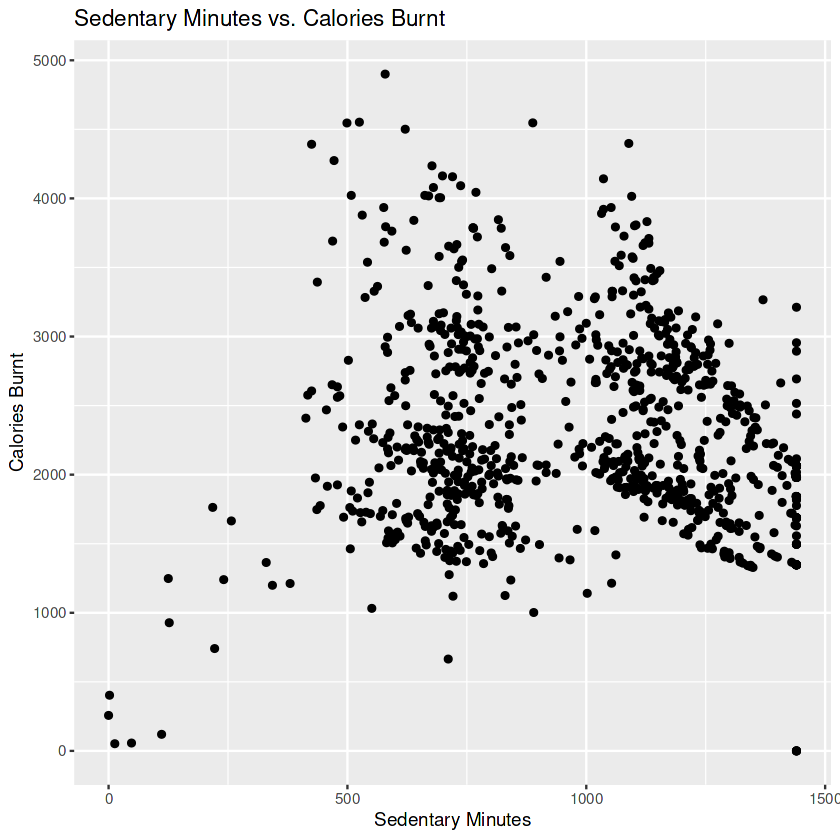

In [40]:
# What's the relationship with sedentary minutes and calories burnt? We expect it to be an inverse linear relationship, let's check this hypothesis out.

ggplot(daily_activity, aes(x = SedentaryMinutes, y = Calories)) +
  geom_point() + 
  labs(title = "Sedentary Minutes vs. Calories Burnt",
       x = "Sedentary Minutes",
       y = "Calories Burnt")

From the above, we can see that the relationship is not an inverse linear one as we thought. The participants who do spend more time sedentary could also be taking part in more intense activities that burn more calories over a shorter period of time. We will use our METs dataframe later to verify this  hypothesis. 

## Let's now merge our activity data with our sleep data to look for more trends, and answer the following questions. 

1) Does physical activity impact on the quality of sleep?

2) Does the number of calories burnt have an effect on sleep quality?


In [41]:
#Let's merge the data. Since we had less number of participants in the sleep dataset, we will have less participants than in the original daily activity dataframe. 

sleep_activity <- merge(x=sleep_day,y=daily_activity, by.x=c("Id","SleepDay"), by.y=c("Id","ActivityDate"))

#we have merged the 2 data frames using the Id and Date columns in a new data frame called 'sleep_Activity'. This new data frame contains all the columns from both sleep_day and daily_activity data frames where the values in 'Id' and 'SleepDay' columns of sleep_day match with the values in 'Id' and 'ActivityDate' columns of daily_activity.

In [42]:
head(sleep_activity) 

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [43]:
#Add a new column called 'PercentTimeAsleep' to get the quality of sleep. 
sleep_activity <- sleep_activity %>% mutate(PercentTimeAsleep = TotalMinutesAsleep/TotalTimeInBed)

In [44]:
#Let's check if our new column has been added.
head(sleep_activity) 

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,PercentTimeAsleep
,<dbl>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,0.9450867
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,0.9434889
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,0.9321267
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,0.9264305
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,0.9831461
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,0.9500000


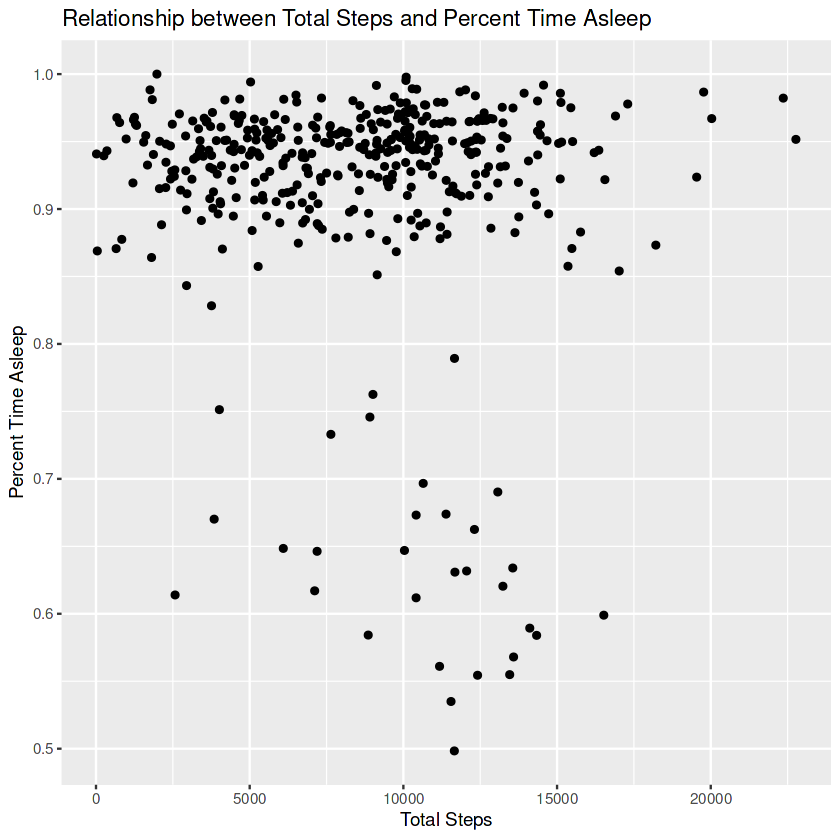

In [45]:
#Let's create a plot to check for the relationship between 'TotalSteps' taken to 'PercentTimeAsleep'
ggplot(sleep_activity, aes(x = TotalSteps, y = PercentTimeAsleep)) +
  geom_point() +
  labs(x = "Total Steps", y = "Percent Time Asleep") +
  ggtitle("Relationship between Total Steps and Percent Time Asleep")

`geom_smooth()` using formula = 'y ~ x'


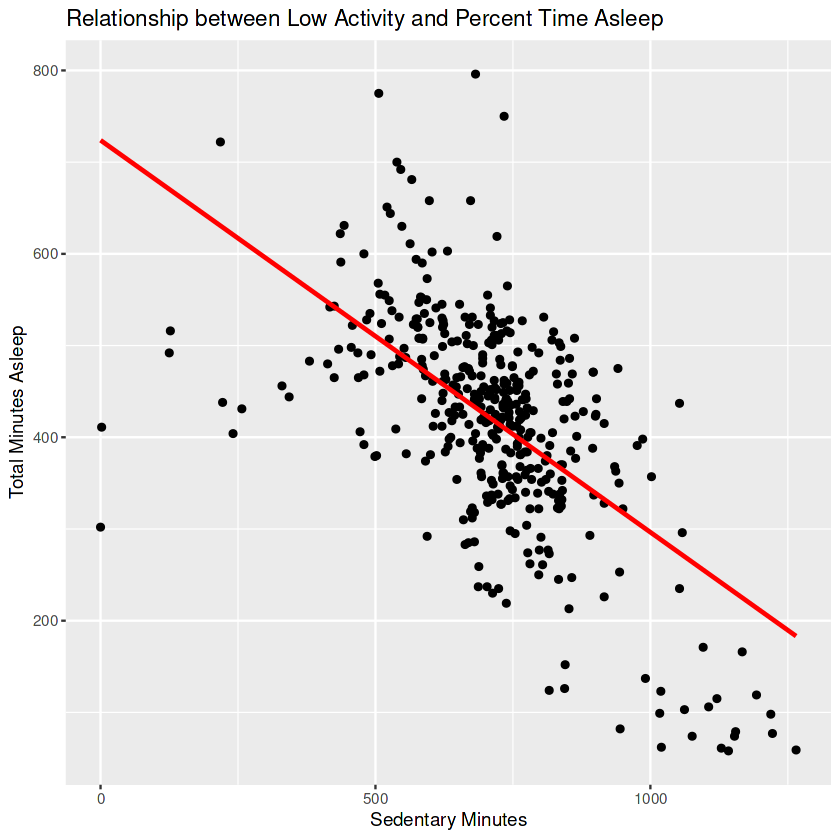

In [46]:
#Let's create a plot to check for the relationship between 'SedentaryMinutes' Vs 'TotalMinutesAsleep'
ggplot(sleep_activity, aes(x = SedentaryMinutes, y = TotalMinutesAsleep)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add the correlation line
  labs(x = "Sedentary Minutes", y = "Total Minutes Asleep") +
  ggtitle("Relationship between Low Activity and Percent Time Asleep")

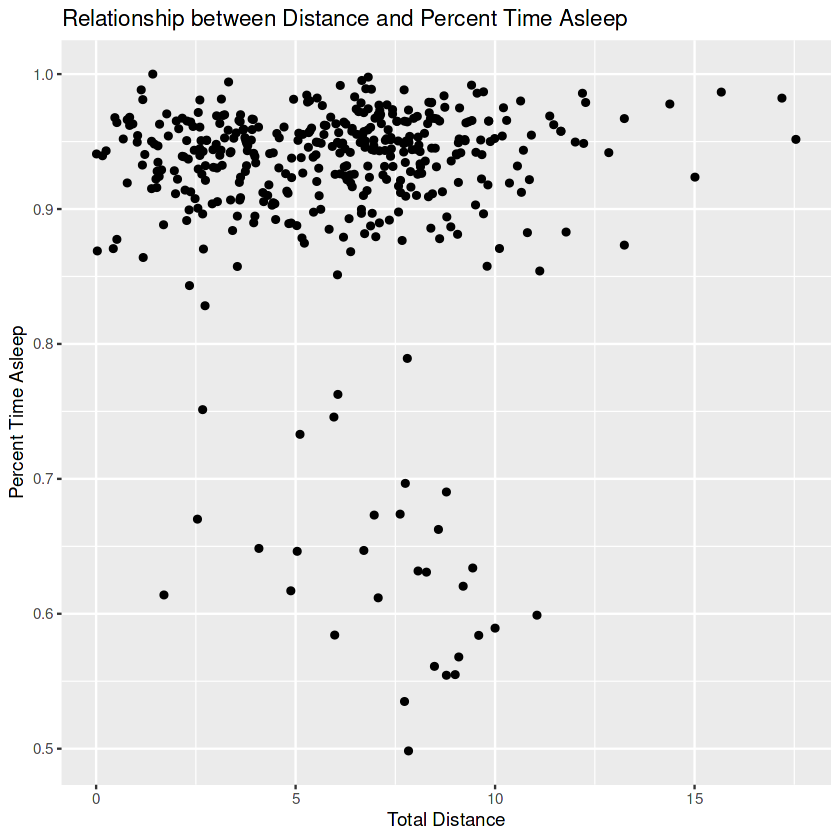

In [47]:
#Let's create a plot to check for the relationship between 'TotalDistance' and 'PercentTimeAsleep'
ggplot(sleep_activity, aes(x = TotalDistance, y = PercentTimeAsleep)) +
  geom_point() +
  labs(x = "Total Distance", y = "Percent Time Asleep") +
  ggtitle("Relationship between Distance and Percent Time Asleep")

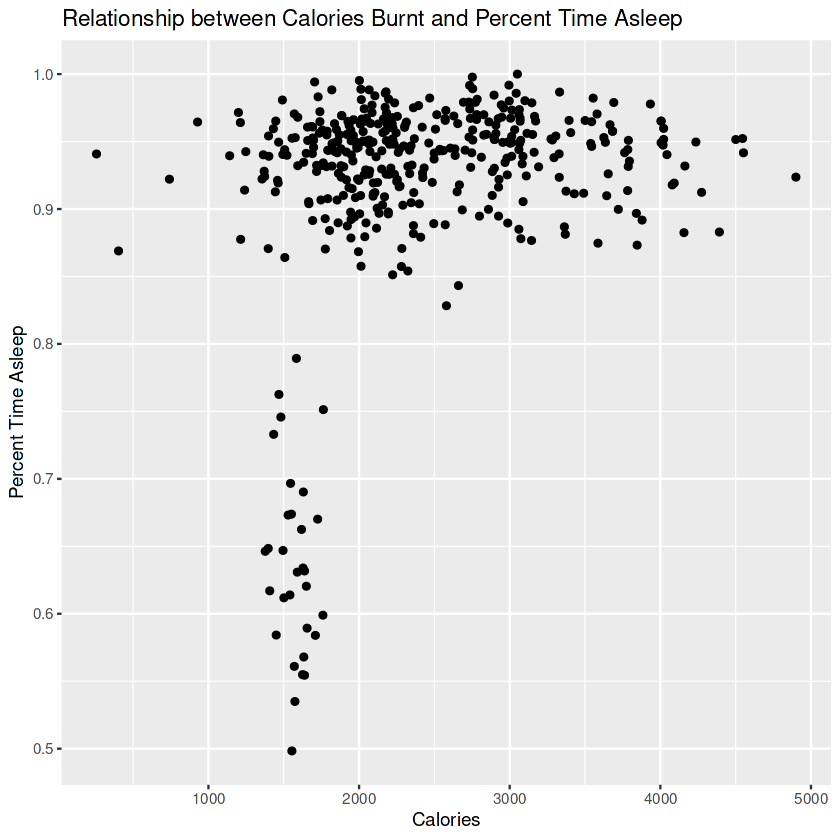

In [48]:
#Let's check the relationship between calories burnt to percent time asleep
ggplot(sleep_activity, aes(x = Calories, y = PercentTimeAsleep)) +
  geom_point() +
  labs(x = "Calories", y = "Percent Time Asleep") +
  ggtitle("Relationship between Calories Burnt and Percent Time Asleep")


*From the above plots, we can say that we cannot confirm any correlation between activity and the quality of sleep they are getting. It is the same when we compare calories burned and quality of sleep as well. The above plots do not show a positive or negative correlation. 

Additionally, it is important that we consider other factors that may impact sleep quality, such as age, gender, health status, and sleep disorders. We will need a study which is controlled for these factors to delve into the 'Does physical activity help/hinder the quality of sleep you get' question and also our sample size will have to be larger.  *

Let's look at the hourly_steps dataset now. We want to determine the peak activity times for the fitbit users. 

By examining the peak activity times of our users, we can provide tailored prompts to enhance their physical activity levels. This analysis will enable us to deliver personalized recommendations that encourage our Bellabeat users to be more active throughout the day.


In [49]:
head(hourly_steps)

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


In [50]:
#check for duplicate data
duplicated(hourly_steps)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [51]:
#let's change the date/time format from character to datetime
hourly_steps$ActivityHour <- mdy_hms(hourly_steps$ActivityHour)

In [52]:
head(hourly_steps)

,Id,ActivityHour,StepTotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


In [53]:
#Calculate the total steps taken each hour 
hourly_steps_summary <- hourly_steps %>%
  group_by(ActivityHour = format(ActivityHour, "%H")) %>%
  summarize(TotalSteps = sum(StepTotal))

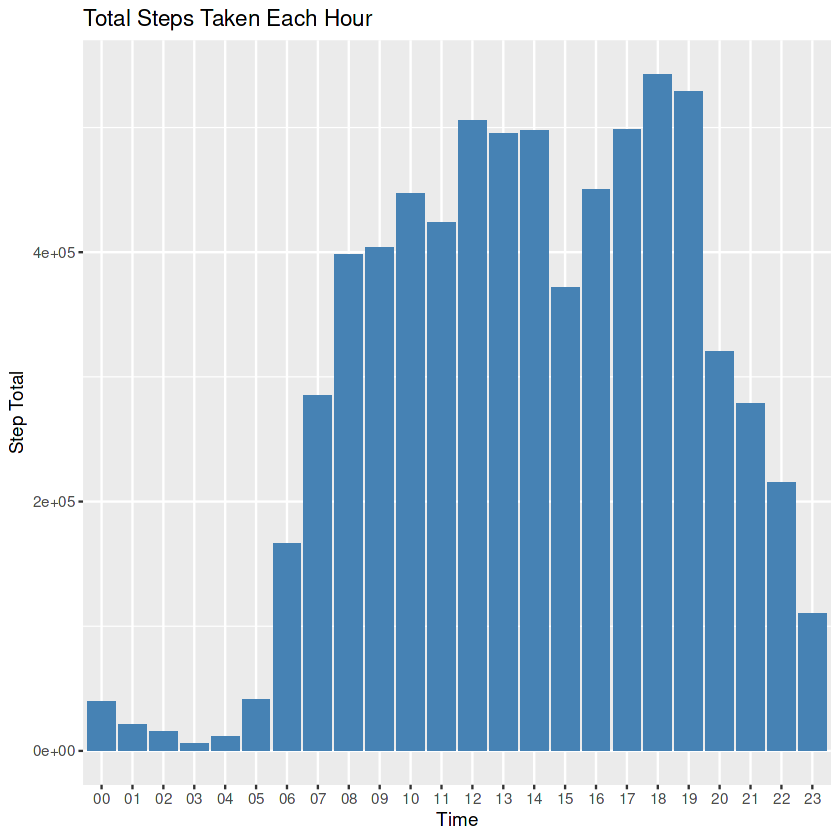

In [54]:
# Create a bar chart to show the hour by hour stepcount. From this, we can see that users are the most active between 1700-2000 hours. 
ggplot(hourly_steps_summary, aes(x = ActivityHour, y = TotalSteps)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Time", y = "Step Total") +
  ggtitle("Total Steps Taken Each Hour")

From the above chart, we can see that users are most active during 5pm-8pm times, but I would like to delve a bit deeper and find out if the days of the week have any impact on this. Is this due to the fact that most users go for a walk/jog when they come back after work? So lets dig deeper to see what our data tells us when its the weekend. 

In [55]:
#let's add days of the week to our hourly_steps dataframe. Lets Create a new column called "day_of_week"
hourly_steps$day_of_week <- weekdays(hourly_steps$ActivityHour)

In [56]:
#let's check if our dataframe has been updated.
head(hourly_steps)

,Id,ActivityHour,StepTotal,day_of_week
,<dbl>,<dttm>,<int>,<chr>
1,1503960366,2016-04-12 00:00:00,373,Tuesday
2,1503960366,2016-04-12 01:00:00,160,Tuesday
3,1503960366,2016-04-12 02:00:00,151,Tuesday
4,1503960366,2016-04-12 03:00:00,0,Tuesday
5,1503960366,2016-04-12 04:00:00,0,Tuesday
6,1503960366,2016-04-12 05:00:00,0,Tuesday


In [57]:
#let's add a new column to tell us if the day of the week is a weekday or weekend. 

hourly_steps$weekend <- weekdays(hourly_steps$ActivityHour) %in% c("Saturday", "Sunday")

head(hourly_steps)

,Id,ActivityHour,StepTotal,day_of_week,weekend
,<dbl>,<dttm>,<int>,<chr>,<lgl>
1,1503960366,2016-04-12 00:00:00,373,Tuesday,FALSE
2,1503960366,2016-04-12 01:00:00,160,Tuesday,FALSE
3,1503960366,2016-04-12 02:00:00,151,Tuesday,FALSE
4,1503960366,2016-04-12 03:00:00,0,Tuesday,FALSE
5,1503960366,2016-04-12 04:00:00,0,Tuesday,FALSE
6,1503960366,2016-04-12 05:00:00,0,Tuesday,FALSE


In [58]:
#let's create a data frame only for the weekend steps. 
weekend_steps <- hourly_steps %>%
filter(weekend == TRUE)

head(weekend_steps)

,Id,ActivityHour,StepTotal,day_of_week,weekend
,<dbl>,<dttm>,<int>,<chr>,<lgl>
1,1503960366,2016-04-16 00:00:00,459,Saturday,TRUE
2,1503960366,2016-04-16 01:00:00,0,Saturday,TRUE
3,1503960366,2016-04-16 02:00:00,63,Saturday,TRUE
4,1503960366,2016-04-16 03:00:00,6,Saturday,TRUE
5,1503960366,2016-04-16 04:00:00,6,Saturday,TRUE
6,1503960366,2016-04-16 05:00:00,12,Saturday,TRUE


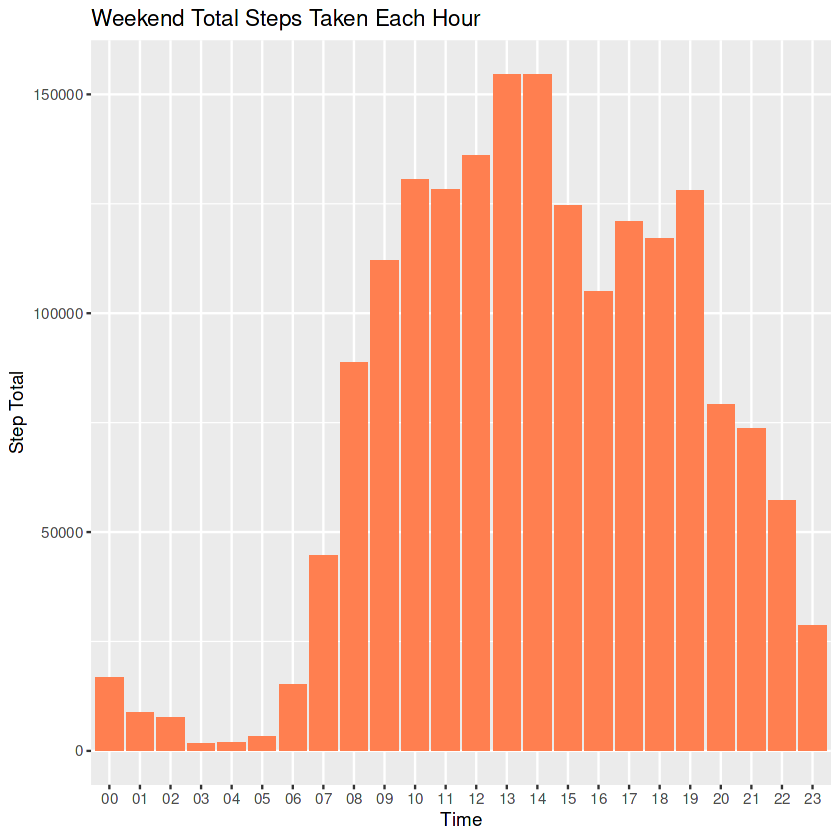

In [59]:
#Calculate the total steps taken each hour 
hourly_steps_weekend_summary <- weekend_steps %>%
  group_by(ActivityHour = format(ActivityHour, "%H")) %>%
  summarize(TotalSteps = sum(StepTotal))

#Let's plot the hour by hour step total only for the weekend now.
ggplot(hourly_steps_weekend_summary, aes(x = ActivityHour, y = TotalSteps)) +
  geom_bar(stat = "identity", fill = "coral") +
  labs(x = "Time", y = "Step Total") +
  ggtitle("Weekend Total Steps Taken Each Hour")

From the above, we can see that durnig the weekend the hours between 1200-1400 are the hours where users are most active. Let's also do a separate plot for only weekdays. 

In [60]:
#let's create a data frame only for the weekday steps. 
weekday_steps <- hourly_steps %>%
filter(weekend == FALSE)

head(weekday_steps)

,Id,ActivityHour,StepTotal,day_of_week,weekend
,<dbl>,<dttm>,<int>,<chr>,<lgl>
1,1503960366,2016-04-12 00:00:00,373,Tuesday,FALSE
2,1503960366,2016-04-12 01:00:00,160,Tuesday,FALSE
3,1503960366,2016-04-12 02:00:00,151,Tuesday,FALSE
4,1503960366,2016-04-12 03:00:00,0,Tuesday,FALSE
5,1503960366,2016-04-12 04:00:00,0,Tuesday,FALSE
6,1503960366,2016-04-12 05:00:00,0,Tuesday,FALSE


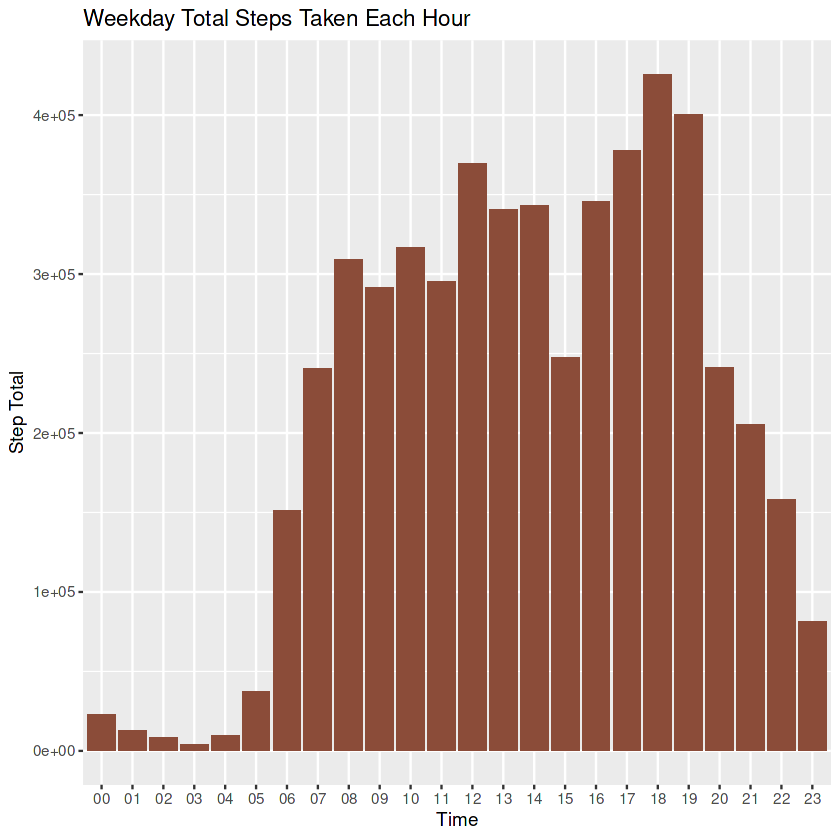

In [61]:
#Calculate the total steps taken each hour 
hourly_steps_weekday_summary <- weekday_steps %>%
  group_by(ActivityHour = format(ActivityHour, "%H")) %>%
  summarize(TotalSteps = sum(StepTotal))

#Let's plot the hour by hour step total only for the weekday now.
ggplot(hourly_steps_weekday_summary, aes(x = ActivityHour, y = TotalSteps)) +
  geom_bar(stat = "identity", fill = "salmon4") +
  labs(x = "Time", y = "Step Total") +
  ggtitle("Weekday Total Steps Taken Each Hour")

The analysis of the data suggests a higher level of user activity during the post-work hours. This finding provides an opportunity for the Bellabeat app to encourage users to be more active during these periods. By providing personalized prompts and reminders during these hours, users may be motivated to incorporate more physical activity into their daily routines.

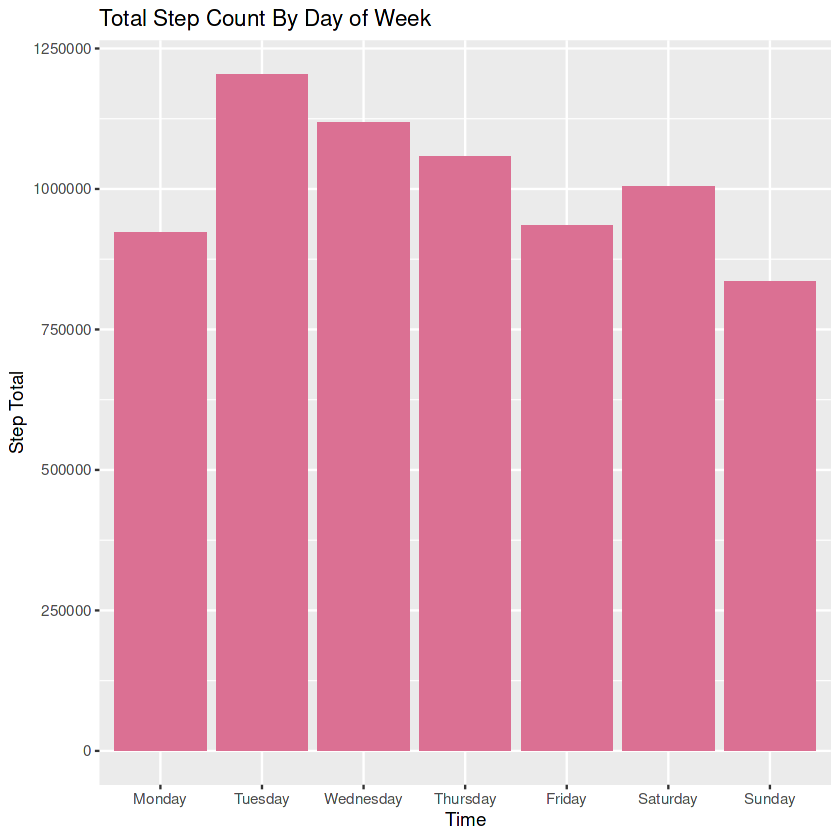

In [62]:
# Create an ordered factor for day_of_week
hourly_steps$day_of_week <- factor(hourly_steps$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

#let's now breakdown the hourly_steps data to find out as to what days of the week users are most active in. 
hourly_steps_day_summary <- hourly_steps %>%
  group_by(day_of_week) %>%
  summarize(TotalSteps = sum(StepTotal))

#Let's plot the day by day step total count for our data
ggplot(hourly_steps_day_summary, aes(x = day_of_week, y = TotalSteps)) +
  geom_bar(stat = "identity", fill = "palevioletred") +
  labs(x = "Time", y = "Step Total") +
  ggtitle("Total Step Count By Day of Week")

The above data reveals that users are most active from Tuesday to Thursday, with Tuesday being the most active day. On the other hand, Sunday appears to be the least active day. This observation aligns with the common notion that people tend to engage in more indoor activities and spend time with their families on Sundays, leading to lower physical activity levels.

In [63]:
#Let's now look at our minute_METS dataset

View(minute_METs)

Id,ActivityMinute,METs
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12
1503960366,4/12/2016 12:06:00 AM,12
1503960366,4/12/2016 12:07:00 AM,12
1503960366,4/12/2016 12:08:00 AM,12


In [64]:
#let's remove duplicates in this dataset(if there are any).
minute_METs <- minute_METs %>% 
distinct()

View(minute_METs)
#this shows there are no duplicates with this dataset. As the dataframe size did not change.

Id,ActivityMinute,METs
<dbl>,<chr>,<int>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12
1503960366,4/12/2016 12:06:00 AM,12
1503960366,4/12/2016 12:07:00 AM,12
1503960366,4/12/2016 12:08:00 AM,12


In [65]:
#let's change the date/time format from character to datetime
minute_METs$ActivityMinute <- mdy_hms(minute_METs$ActivityMinute)

In [66]:
#Divide current MET values by 10 to get actual MET value
minute_METs$METs <- minute_METs$METs / 10

# Calculate the average MET per person
average_MET <- aggregate(METs ~ Id, data = minute_METs, FUN = mean)

# Print the average MET per person
print(average_MET)


           Id     METs
1  1503960366 1.666855
2  1624580081 1.252201
3  1644430081 1.410767
4  1844505072 1.187798
5  1927972279 1.064828
6  2022484408 1.695537
7  2026352035 1.393684
8  2320127002 1.316299
9  2347167796 1.572049
10 2873212765 1.528508
11 3372868164 1.457302
12 3977333714 1.545146
13 4020332650 1.219822
14 4057192912 1.205303
15 4319703577 1.408290
16 4388161847 1.637567
17 4445114986 1.338729
18 4558609924 1.535023
19 4702921684 1.495887
20 5553957443 1.450744
21 5577150313 1.874226
22 6117666160 1.473003
23 6290855005 1.319263
24 6775888955 1.184183
25 6962181067 1.559026
26 7007744171 1.695391
27 7086361926 1.593890
28 8053475328 1.702032
29 8253242879 1.322672
30 8378563200 1.607676
31 8583815059 1.315053
32 8792009665 1.202626
33 8877689391 1.966798


In [67]:
# Create a new column for intensity level
minute_METs$IntensityLevel <- cut(minute_METs$METs,
                                  breaks = c(0, 1.5, 3, 6, Inf),
                                  labels = c("Sedentary", "Light", "Moderate", "Vigorous"))

# View the updated data frame
head(minute_METs)


,Id,ActivityMinute,METs,IntensityLevel
,<dbl>,<dttm>,<dbl>,<fct>
1,1503960366,2016-04-12 00:00:00,1.0,Sedentary
2,1503960366,2016-04-12 00:01:00,1.0,Sedentary
3,1503960366,2016-04-12 00:02:00,1.0,Sedentary
4,1503960366,2016-04-12 00:03:00,1.0,Sedentary
5,1503960366,2016-04-12 00:04:00,1.0,Sedentary
6,1503960366,2016-04-12 00:05:00,1.2,Sedentary


In [68]:
# Calculate the count of each intensity level
intensity_counts <- table(minute_METs$IntensityLevel)

# Calculate the percentage of each intensity level
intensity_percentages <- prop.table(intensity_counts) * 100

# Display the percentage of each intensity level
intensity_percentages


Sedentary     Light  Moderate  Vigorous 
83.895417  8.133841  6.319456  1.651286 

Don't know how to automatically pick scale for object of type <table>.
Defaulting to continuous.


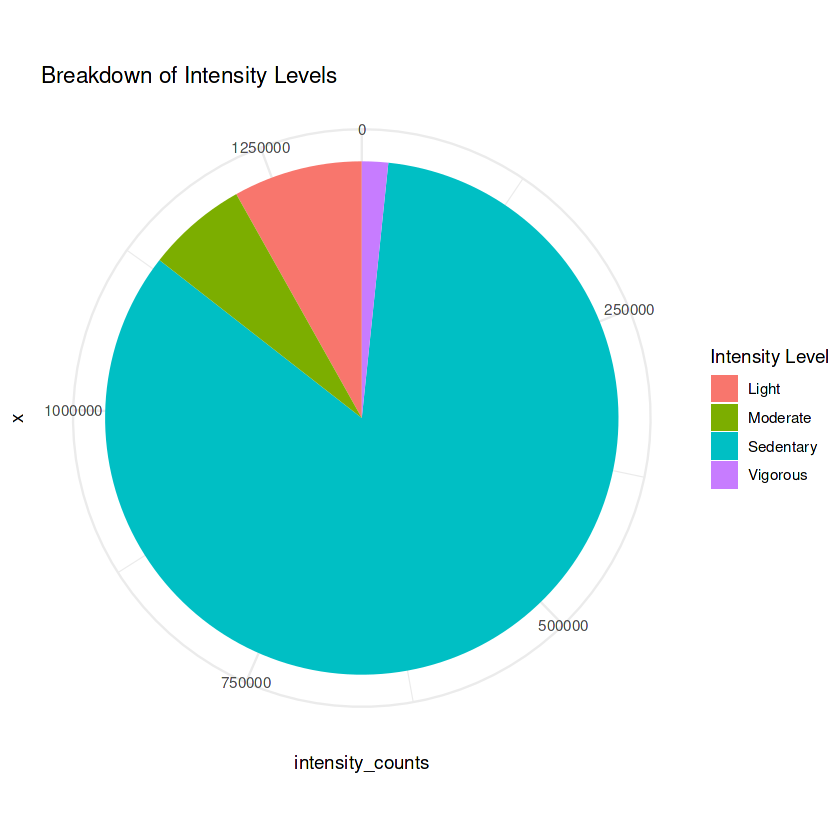

In [69]:
#Let's show the breakdown in the form of pie chart to show how active our subjects are. 

# Calculate the count of each intensity level
intensity_counts <- table(minute_METs$IntensityLevel)

# Create a pie chart
ggplot(data = NULL, aes(x = "", y = intensity_counts, fill = names(intensity_counts))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(fill = "Intensity Level") +
  ggtitle("Breakdown of Intensity Levels") +
  theme_minimal()

Many individuals tend to engage in sedentary activities for a substantial portion of their day, which is a common behavior. However, it's encouraging to observe that participants also spend approximately 15% of their time on light to vigorous activities. This translates to an average of about 3-4 hours per day. By considering this as a baseline, we can motivate our Bellabeat users to aim for similar levels of activity and incorporate more light to vigorous activities into their daily routines.

# Act Phase

Conclusions

Now that we have analysed and shared the findings from the data, the below are the recommendations I would make to the Bellabeat team. The product that I would choose to apply these insights to is the Bellabeat app. 

* Sleep - We have observed a significant inverse relationship between the duration of sedentary minutes and the total minutes of quality sleep. These findings provide valuable insights for our Bellabeat app users, suggesting that increasing their overall activity levels throughout the day can positively impact the quality and duration of their sleep. By encouraging users to be more active, we can support them in achieving better sleep patterns and overall well-being. 
* Physical activity - The analysis of the data suggests a higher level of user activity during the weekday post-work hours, from 5pm-8pm. This finding provides an opportunity for the Bellabeat app to encourage users to be more active during these periods. By providing personalized prompts and reminders during these hours, users may be motivated to incorporate more physical activity into their daily routines.
* The data reveals a clear correlation between step count and calories burned, indicating that being more active leads to increased calorie expenditure. This valuable insight allows us to provide personalized recommendations to Bellabeat app users who have set daily calorie goals, encouraging them to engage in more physical activity to effectively achieve their goals.

Thank you for taking the time to view my case study. This is my first project with R. I would love to get your feedback and any recommendations for improvement. 